In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from gputils import coevolution, draw_tree, tools, tqdm

num_generations = 20

In [ ]:
# To test various primitives sets
configurations = [
    {'ifelse': False, 'logicals': False, 'angle_primitives': False},
    {'ifelse': False, 'logicals': False, 'angle_primitives': True},
    {'ifelse': True, 'logicals': False, 'angle_primitives': True},
    {'ifelse': False, 'logicals': True, 'angle_primitives': True},
    {'ifelse': True, 'logicals': True, 'angle_primitives': True},
]

results = {
    i: {
        'avg_fits1_last_gen': [],
        'max_fits1_last_gen': [],
        'avg_fits2_last_gen': [],
        'max_fits2_last_gen': [],
        'time': None
    }
    for i in range(len(configurations))
}

print(f'Number of generations: {num_generations}')

# For every configuration, run 500 instances to assess the effect of primitives
for config_idx, config in enumerate(configurations):
    print(f'\nRunning configuration {config_idx}: {config}')
    
    start = time.time()

    for _ in tqdm(range(500)):
        final_pop1, final_pop2, avg_fits1, max_fits1, avg_fits2, max_fits2 = coevolution(
            pop_size=30, 
            generations=num_generations,
            **config
        )

        best1 = tools.selBest(final_pop1, k=1)[0]
        best2 = tools.selBest(final_pop2, k=1)[0]

        results[config_idx]['avg_fits1_last_gen'].append(avg_fits1[-1])
        results[config_idx]['max_fits1_last_gen'].append(max_fits1[-1])
        results[config_idx]['avg_fits2_last_gen'].append(avg_fits2[-1])
        results[config_idx]['max_fits2_last_gen'].append(max_fits2[-1])

    end = time.time()
    results[config_idx]['time'] = end - start

Number of generations: 20

Running configuration 1: {'ifelse': False, 'logicals': False, 'angle_primitives': False}


100%|██████████| 500/500 [43:43<00:00,  5.25s/it]



Running configuration 2: {'ifelse': False, 'logicals': False, 'angle_primitives': True}


100%|██████████| 500/500 [41:35<00:00,  4.99s/it]



Running configuration 3: {'ifelse': True, 'logicals': False, 'angle_primitives': True}


100%|██████████| 500/500 [45:37<00:00,  5.47s/it]



Running configuration 4: {'ifelse': False, 'logicals': True, 'angle_primitives': True}


100%|██████████| 500/500 [43:29<00:00,  5.22s/it]



Running configuration 5: {'ifelse': True, 'logicals': True, 'angle_primitives': True}


100%|██████████| 500/500 [46:58<00:00,  5.64s/it]


In [ ]:
fitness_results = pd.DataFrame(columns=[
    'pop1 avg (mean)', 'pop1 max (mean)', 'pop1 avg (std)', 'pop1 max (std)',
    'pop2 avg (mean)', 'pop2 max (mean)', 'pop2 avg (std)', 'pop2 max (std)', 'time'
    ]
)

for i in range(5):
    
    fitness_results = pd.concat([
        fitness_results,
        pd.DataFrame([[
            np.mean(results[i]['avg_fits1_last_gen']),
            np.mean(results[i]['max_fits1_last_gen']),
            np.std(results[i]['avg_fits1_last_gen']),
            np.std(results[i]['max_fits1_last_gen']),
            np.mean(results[i]['avg_fits2_last_gen']),
            np.mean(results[i]['max_fits2_last_gen']),
            np.std(results[i]['avg_fits2_last_gen']),
            np.std(results[i]['max_fits2_last_gen']),
            results[i]['time']
        ]], columns = fitness_results.columns)
    ], ignore_index=True)

fitness_results.to_csv('results/coevo_results.csv', index=False)

In [ ]:
fitness_results
# 0 --> Base case
# 1 --> w/ ephemeral constant (-pi, pi) and sin, cos operators
# 2 --> w/ ephemeral constant (-pi, pi) and sin, cos operators,  w/ if-else conditional operator
# 3 --> w/ ephemeral constant (-pi, pi) and sin, cos operators,  w/ "<", ">" logical operators
# 4 --> w/ everything

,pop1 avg (mean),pop1 max (mean),pop1 avg (std),pop1 max (std),pop2 avg (mean),pop2 max (mean),pop2 avg (std),pop2 max (std),time
0,7.274000,27.300,8.666255,25.757135,6.828067,24.938,7.189905,21.813256,2623.457521
1,6.468467,23.746,8.411996,25.067858,6.155000,22.858,8.303472,24.152139,2495.633010
2,5.841133,21.808,6.608015,22.475123,6.314133,22.572,7.488466,24.071660,2737.388145
3,5.784533,21.296,7.376509,23.670919,5.822867,21.482,7.790379,26.680661,2609.652583
4,5.895333,20.664,8.174886,23.164523,5.582933,20.412,8.164076,25.657168,2818.363059


In [92]:
# Comparing worst case (4) with best cases (0 and 1)
case0_pop1, case0_pop2, _, case0_max1, _, case0_max2 = coevolution(pop_size=30, generations=num_generations, 
                                                 ifelse=False, logicals=False, angle_primitives=False)
case1_pop1, case1_pop2, case1_avg1, case1_max1, case1_avg2, case1_max2 = coevolution(pop_size=30, generations=num_generations, 
                                                 ifelse=False, logicals=False, angle_primitives=True)
case4_pop1, case4_pop2, _, case4_max1, _, case4_max2 = coevolution(pop_size=30, generations=num_generations, 
                                                 ifelse=True, logicals=True, angle_primitives=True)

best_individuals = {
    0: [tools.selBest(case0_pop1, k=1)[0], tools.selBest(case0_pop2, k=1)[0], case0_max1[-1], case0_max2[-1]], 
    1: [tools.selBest(case1_pop1, k=1)[0], tools.selBest(case1_pop2, k=1)[0], case1_max1[-1], case1_max2[-1]],
    4: [tools.selBest(case4_pop1, k=1)[0], tools.selBest(case4_pop2, k=1)[0], case4_max1[-1], case4_max2[-1]]
}

100%|██████████| 20/20 [00:05<00:00,  3.75 generation/s]


In [93]:
for i in [0,1,4]:
    print(f'Case {i}')
    print(f'Best individual from population 1, with fitness {best_individuals[i][2]}')
    print(best_individuals[i][0])
    print(f'Best individual from population 2, with fitness {best_individuals[i][3]}')
    print(f'{best_individuals[i][1]}\n')

Case 0
Best individual from population 1, with fitness 9.0
add(sub(wall_distance, protected_div(add(health, enemy_distance), neg(wall_distance))), max(protected_div(0.25602447891934754, wall_distance), health))
Best individual from population 2, with fitness 3.0
mul(min(mul(ammo, 10), min(ammo, wall_distance)), max(neg(ammo), mul(5, enemy_distance)))

Case 1
Best individual from population 1, with fitness 16.0
max(max(min(protected_div(add(0.994531196370144, 0.16898048423696155), add(health, 5)), add(neg(0.5474768354442077), neg(wall_distance))), sub(neg(min(1, -2.0908111569426016)), protected_div(sub(wall_distance, wall_distance), neg(enemy_direction)))), neg(add(sub(min(health, 1.2957694104787074), add(health, enemy_distance)), mul(mul(-0.4759951446049644, enemy_distance), min(enemy_direction, min(health, 1.2957694104787074))))))
Best individual from population 2, with fitness 11.0
add(mul(min(cos(2), min(ammo, neg(enemy_distance))), cos(max(mul(enemy_direction, 2), protected_div(-0.

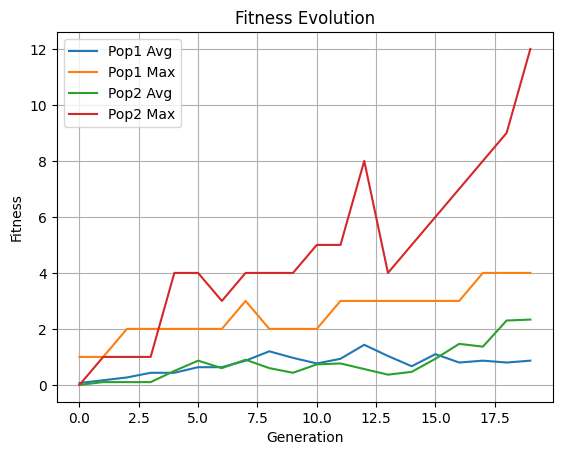

In [ ]:
# Plotting the fitness evolution across the generations for case 1
plt.plot(case1_avg1, label='Pop1 Avg')
plt.plot(case1_max1, label='Pop1 Max')
plt.plot(case1_avg2, label='Pop2 Avg')
plt.plot(case1_max2, label='Pop2 Max')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Evolution')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Drawing trees for cases 0 (supposedly, the slimmest) and 4 (supposedly, the largest) 
draw_tree(best_individuals[0][0], filename='results/case0_tree_pop1', format='png')
draw_tree(best_individuals[0][1], filename='results/case0_tree_pop2', format='png')

draw_tree(best_individuals[4][0], filename='results/case4_tree_pop1', format='png')
draw_tree(best_individuals[4][1], filename='results/case4_tree_pop2', format='png')

Tree saved as case0_tree_pop1.png
Tree saved as case0_tree_pop2.png
Tree saved as case4_tree_pop1.png
Tree saved as case4_tree_pop2.png
